In [1]:
#%matplotlib qt
#%matplotlib auto
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import math
import sqlite3
from datetime import datetime as time, timedelta

## Load data

In [3]:
conn = sqlite3.connect("../rsc/caption_party.db")
data = pd.read_sql("SELECT * from tab", conn)
data['publishedAt'] = pd.DatetimeIndex(data['publishedAt'])
data['updated'] = pd.DatetimeIndex(data['updated'])

data['viewCount'] = pd.to_numeric(data['viewCount'], downcast='unsigned')
data['commentCount'] = pd.to_numeric(data['commentCount'], downcast='unsigned', errors='coerce')

data.set_index('videoId', inplace=True)

## Dates and periods

In [4]:
bt_election = time.strptime('24.09.2017', "%d.%m.%Y")
eu_election = time.strptime('26.05.2019', "%d.%m.%Y")

bt_start = bt_election - timedelta(days=90)
eu_start = eu_election - timedelta(days=90)
bt_end = bt_election + timedelta(days=90)
eu_end = eu_election + timedelta(days=90)

## Colors

In [5]:
parties = ['linke', 'spd', 'grüne', 'cdu', 'fdp', 'afd']
colors = {'linke': '#FFC0CB',
          'grüne': '#42923bff',
          'spd': '#e2001aff',
          'cdu': '#252422ff',
          'fdp': '#ffec01ff',
          'afd': '#009ee0ff'}

### Upload analysis

/usr/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


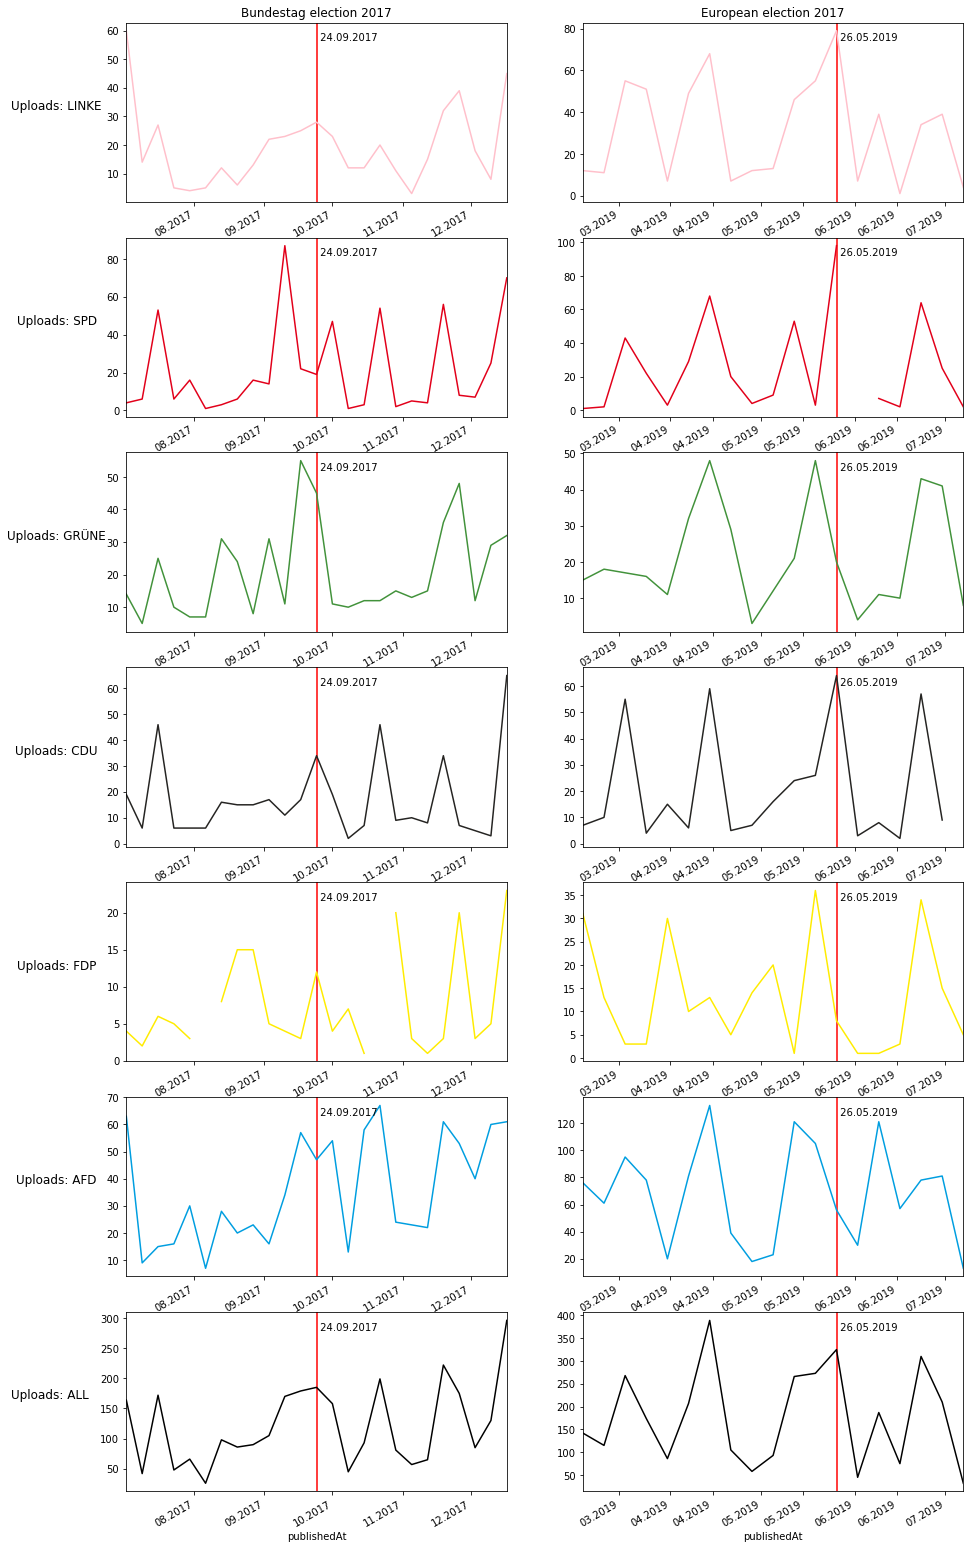

In [6]:
upload_count = data.groupby([pd.Grouper(key='publishedAt', freq='W'), data['party']])['title'].count().unstack()
f, ax = plt.subplots(len(parties)+1,2, figsize=(15,30))#, sharey='row')
for ix,party in enumerate(parties + [parties]):
    axL = ax[ix][0]
    axR = ax[ix][1]
    if type(party) is list:
        title = 'Uploads: ALL'
        color = 'black'
        uploads = upload_count[party].sum(axis=1)
    else:
        title = 'Uploads: ' + party.upper()
        color = colors[party]
        uploads = upload_count[party]
    if ix == 0:
        axL.set_title('Bundestag election 2017', size='large')
        axR.set_title('European election 2017', size='large')
    axL.axvline(x=bt_election, c='red')
    axR.axvline(x=eu_election, c='red')
    axL.annotate(" 24.09.2017", xy=(bt_election,.9), xycoords=("data", "axes fraction"))
    axR.annotate(" 26.05.2019", xy=(eu_election,.9), xycoords=("data", "axes fraction"))
    axL.set_ylabel(title, rotation=0, size='large', labelpad=50)
    uploads[bt_start:bt_end].plot(color=color, ax=axL)
    uploads[eu_start:eu_end].plot(color=color, ax=axR)
    axL.xaxis.set_major_formatter(mdates.DateFormatter('%m.%Y'))
    axR.xaxis.set_major_formatter(mdates.DateFormatter('%m.%Y'))

### View count analysis

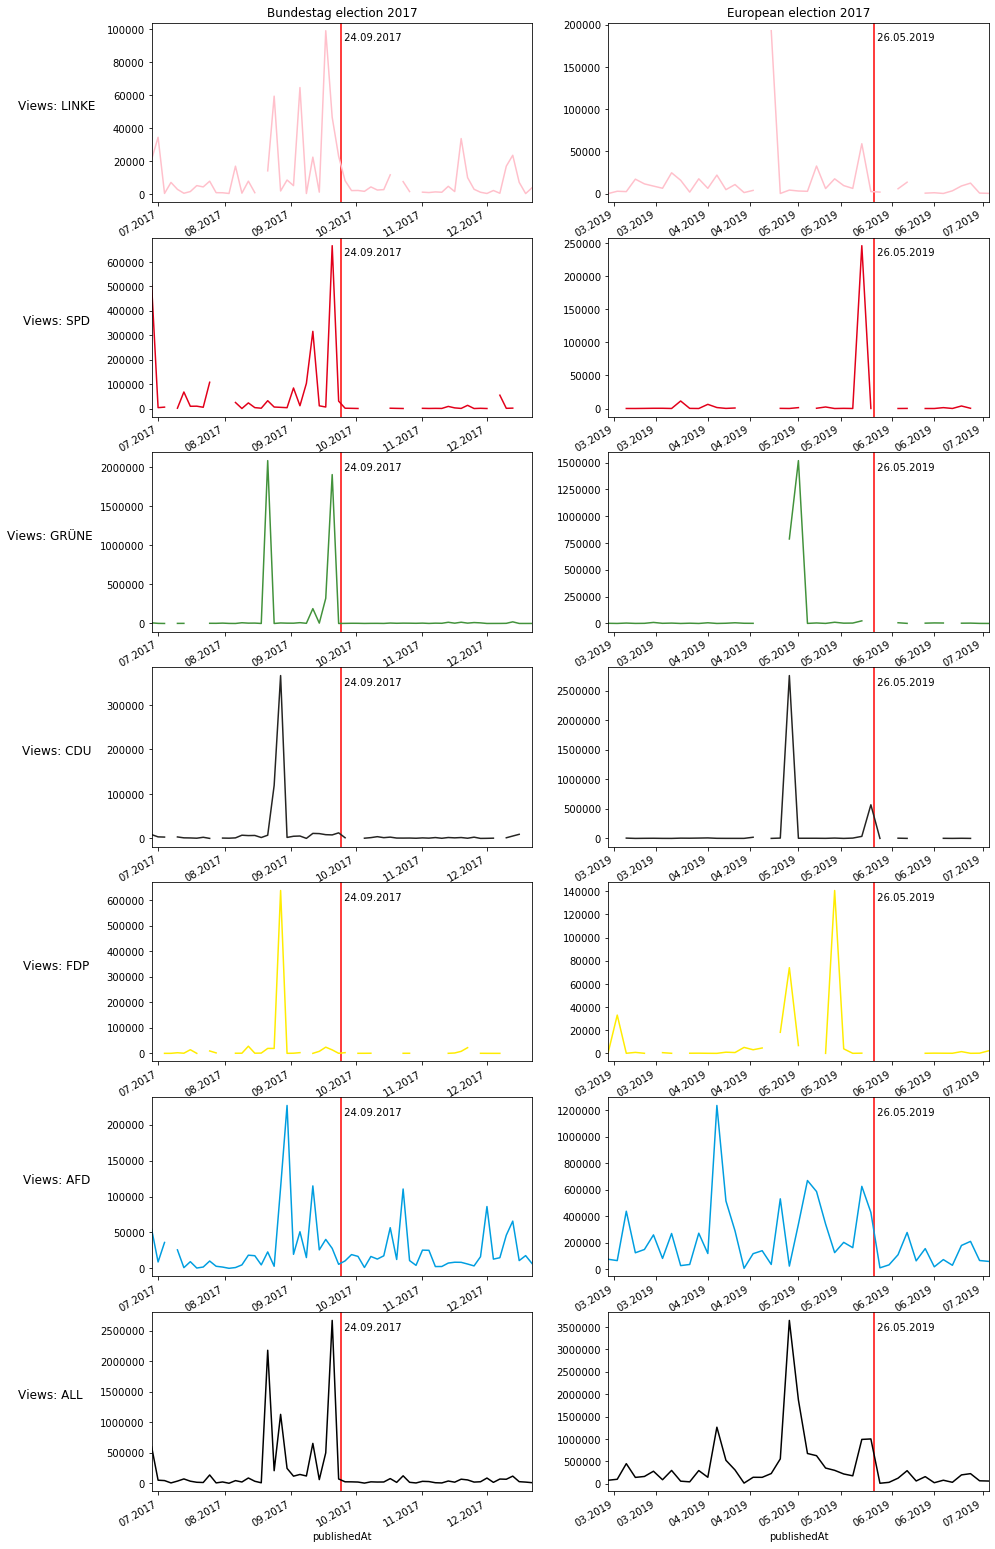

In [7]:
view_count = data.groupby([pd.Grouper(key='publishedAt', freq='3d'), data['party']])['viewCount'].sum().unstack()
f, ax = plt.subplots(len(parties)+1,2, figsize=(15,30))#, sharey='row')
for ix,party in enumerate(parties + [parties]):
    axL = ax[ix][0]
    axR = ax[ix][1]
    if type(party) is list:
        title = 'Views: ALL'
        color = 'black'
        views = view_count[party].sum(axis=1)
    else:
        title = 'Views: ' + party.upper()
        color = colors[party]
        views = view_count[party]
    if ix == 0:
        axL.set_title('Bundestag election 2017', size='large')
        axR.set_title('European election 2017', size='large')
    axL.axvline(x=bt_election, c='red')
    axR.axvline(x=eu_election, c='red')
    axL.annotate(" 24.09.2017", xy=(bt_election,.9), xycoords=("data", "axes fraction"))
    axR.annotate(" 26.05.2019", xy=(eu_election,.9), xycoords=("data", "axes fraction"))
    axL.set_ylabel(title, rotation=0, size='large', labelpad=50)
    views[bt_start:bt_end].plot(color=color, ax=axL)
    views[eu_start:eu_end].plot(color=color, ax=axR) 
    axL.xaxis.set_major_formatter(mdates.DateFormatter('%m.%Y'))
    axR.xaxis.set_major_formatter(mdates.DateFormatter('%m.%Y'))

### Comment count analysis

In [1]:
view_count = data.groupby([pd.Grouper(key='publishedAt', freq='3d'), data['party']])['commentCount'].sum().unstack()
f, ax = plt.subplots(len(parties)+1,2, figsize=(15,30))#, sharey='row')
for ix,party in enumerate(parties + [parties]):
    axL = ax[ix][0]
    axR = ax[ix][1]
    if type(party) is list:
        title = 'Views: ALL'
        color = 'black'
        views = view_count[party].sum(axis=1)
    else:
        title = 'Views: ' + party.upper()
        color = colors[party]
        views = view_count[party]
    if ix == 0:
        axL.set_title('Bundestag election 2017', size='large')
        axR.set_title('European election 2017', size='large')
    axL.axvline(x=bt_election, c='red')
    axR.axvline(x=eu_election, c='red')
    axL.annotate(" 24.09.2017", xy=(bt_election,.9), xycoords=("data", "axes fraction"))
    axR.annotate(" 26.05.2019", xy=(eu_election,.9), xycoords=("data", "axes fraction"))
    axL.set_ylabel(title, rotation=0, size='large', labelpad=50)
    views[bt_start:bt_end].plot(color=color, ax=axL)
    views[eu_start:eu_end].plot(color=color, ax=axR) 
    axL.xaxis.set_major_formatter(mdates.DateFormatter('%m.%Y'))
    axR.xaxis.set_major_formatter(mdates.DateFormatter('%m.%Y'))

NameError: name 'data' is not defined

/usr/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/usr/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


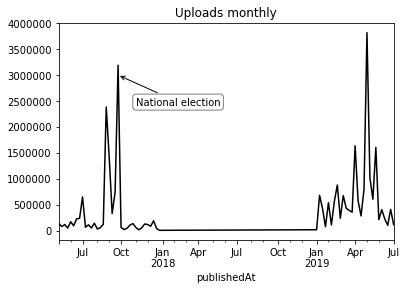

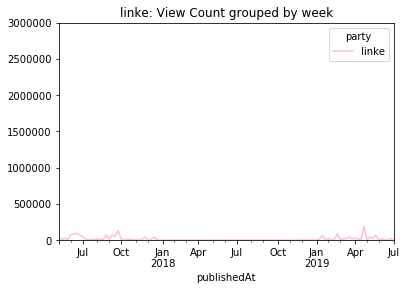

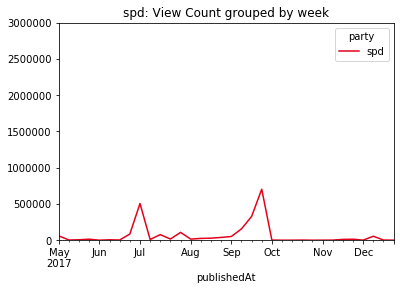

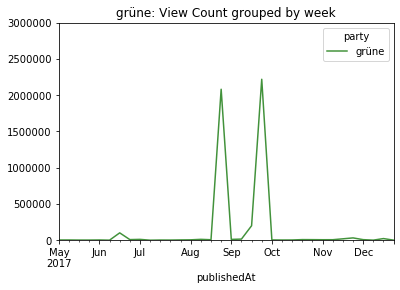

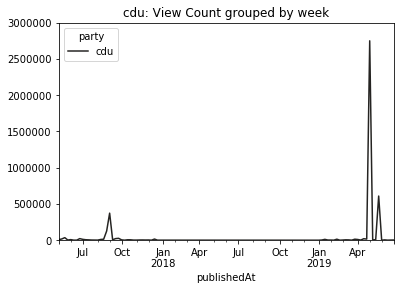

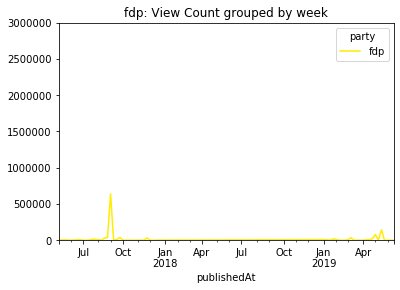

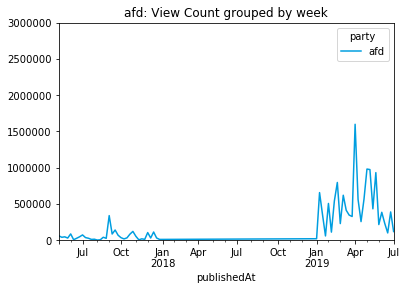

In [237]:
style = dict(size=10, color='gray')
plt.title("Uploads monthly")
count_month = data.groupby(data["publishedAt"].dt.to_period('W'))[
    'viewCount'].sum()
plt.annotate("National election", xy=('2017-09-24', 3000000),  xycoords='data', bbox=dict(boxstyle="round", fc="none", ec="gray"), xytext=(60, -30), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))
count_month.plot(color='black');

for party in parties:
    count_party_month = data[data['party'] == party].groupby([data["publishedAt"].dt.to_period('W'), data['party']])['viewCount'].sum().unstack()
    count_party_month.plot(color=colors[party])
    plt.title(party + ": View Count grouped by week")
    plt.axis([None, None, 0, 3000000])

TypeError: Cannot compare tz-naive and tz-aware datetime-like objects

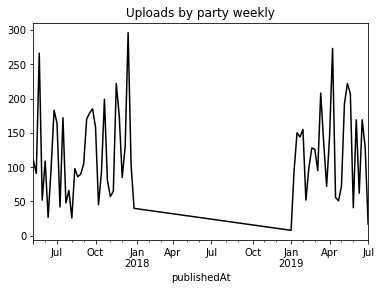

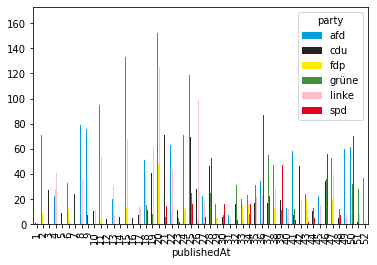

In [238]:
plt.title("Uploads weekly")
count_week = data.groupby(data["publishedAt"].dt.to_period('W'))[
    'title'].count()
count_week.plot(color='black')
# WEEKLY
plt.title("Uploads by party weekly")
count_party_week = data.groupby([data["publishedAt"].dt.week, data['party']])[
    'title'].count().unstack()
count_party_week.plot(color=count_party_week.apply(
    lambda x: colors[x.name]), kind='bar')

data[data['publishedAt'] > '10.10.2017']['publishedAt']

peak2 = data.query(
    'publishedAt > "10.10.2017" and publishedAt < "10.20.2017"').index
for title in data.loc[peak2]['title']:
    print(title)


In [13]:
count = data.groupby([data["publishedAt"].dt.week, data['party']])['title'].count().unstack()
count.plot(color=count.apply(lambda x: colors[x.name]))

## ViewCount

In [10]:
data.sort_values('viewCount')[['title', 'channelTitle','publishedAt','viewCount']]

,title,channelTitle,publishedAt,viewCount
videoId,,,,
9k-yhsfruKg,Änderung der Landesbauordnung,LinksfraktionMV,2017-11-15 13:29:41,0
r2KsJ1c5a7U,Änderung des Landesausführungsgesetzes - Jörg ...,SPD-Landtagsfraktion Mecklenburg-Vorpommern,2017-10-18 16:02:52,0
2oGiVmU1tvc,Windenergieerlass,LinksfraktionMV,2017-07-14 09:13:33,0
IVViDckoUX0,Metropolregionen unterstützen - Modellprojekte...,LinksfraktionMV,2017-09-28 11:12:41,0
TFLu6FvuciY,Johannes Remmel zur fairen Gestaltung des Wel...,Grüne Fraktion NRW,2017-09-14 10:51:12,1
ZrHfSuwaQ-M,Horst Becker zum Erhalt des Tariftreue- und Ve...,Grüne Fraktion NRW,2017-09-14 10:51:11,1
61L0EwCHiYQ,"14.12.2017, Dietmar Eifler, CDU-Fraktion, Land...",cdufraktionmv,2017-12-14 10:01:39,1
-Cy71F-Pm80,Matthi Bolte zu Studienplätzen und Hochschulfi...,Grüne Fraktion NRW,2017-09-15 12:46:54,1
P3pslnSMbf0,Maritimes Erbe - Jochen Schulte,SPD-Landtagsfraktion Mecklenburg-Vorpommern,2017-12-13 21:25:11,1


## CommentCount

In [14]:
data[['title', 'channelTitle','publishedAt','viewCount', 'commentCount']].sort_values('commentCount', ascending=False)

,title,channelTitle,publishedAt,viewCount,commentCount
videoId,,,,,
zavm-3ZvnEI,Grandiose Jungfernrede von Bernd Baumann (AfD)...,AfD-Fraktion Hamburg,2017-10-24 10:16:03,95748,1523.0
tXyVdCKjldI,FDP Wahlspot zur Bundestagswahl 2017,FDP,2017-08-28 08:37:29,636091,881.0
IPT-7P0EtW0,TV-Spot zur Bundestagswahl 2017: Deutschland v...,cdutv,2017-08-25 12:31:46,115896,733.0
arRM5XcHjyo,"Was würdest du tun, wenn du Bundeskanzler wärst?",SPD,2017-09-22 06:19:33,627397,363.0
C0HEQCtU-5Y,"Sahra Wagenknecht, DIE LINKE: »Sie machen die ...",Fraktion DIE LINKE. im Bundestag,2017-06-01 08:33:53,49191,302.0
0dAFabCf-lY,Katja Kipping nimmt die Hetzer der AfD auseina...,DIE LINKE,2017-09-22 10:45:07,20443,298.0
S8LZECFClMo,AfD spricht Klartext zum Klimawandel – Altpart...,AfD-Fraktion Sachsen-Anhalt,2017-07-06 14:19:45,31695,277.0
wddS9dCXXGc,Holen wir uns das Land zurück! Sozial. Gerecht...,DIE LINKE,2017-06-13 11:25:39,84257,233.0
yUMkMPiFUwM,Keuter (AfD): Diäten-Erhöhung? Schämen Sie sic...,AfD-Fraktion Bundestag,2017-12-13 13:44:42,46810,207.0


In [11]:
data['publishedAt'] = pd.to_datetime(data['publishedAt']) 

In [69]:
viewCount = data.groupby([data["publishedAt"].dt.month, data['party']]).sum()['viewCount'].unstack()
viewCount

party,afd,cdu,fdp,grüne,linke,spd
publishedAt,,,,,,
5,202443,68476,10895,12271,74342,81882
6,205305,37237,14596,121772,346238,600177
7,96234,16451,28746,10409,67857,224825
8,280882,516936,706624,2115793,111985,95865
9,461741,65433,52328,2439869,274129,1234129
10,259094,14017,1610,23892,35932,2712
11,105357,13118,33873,69637,60367,27939
12,271491,17360,3574,24182,57093,57496


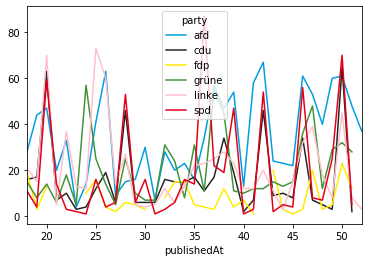

In [76]:
count = data.groupby([data["publishedAt"].dt.week, data['party']])['title'].count().unstack()
count.plot(color=count.apply(lambda x: colors[x.name]))

In [77]:
count.sum()

party
afd      1217.0
cdu       563.0
fdp       253.0
grüne     694.0
linke     739.0
spd       650.0
dtype: float64

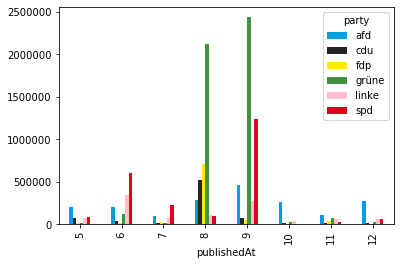

In [71]:
viewCount.plot(kind='bar', color=viewCount.apply(lambda x: colors[x.name]))

In [72]:
data.columns

Index(['caption', 'categoryId', 'channelId', 'channelTitle', 'commentCount',
       'defaultAudioLanguage', 'defaultLanguage', 'definition', 'description',
       'dimension', 'dislikeCount', 'duration', 'favoriteCount',
       'licensedContent', 'likeCount', 'liveBroadcastContent', 'localized',
       'party', 'projection', 'publishedAt', 'region', 'regionRestriction',
       'subtitle', 'tags', 'thumbnails', 'title', 'updated', 'viewCount'],
      dtype='object')